# Multi dependence

## Imports

In [18]:
import numpy as np                       
import matplotlib.pyplot as plt
from time import time
from sklearn import metrics
import dit as dt
import dit.multivariate as dm
from dit.multivariate import caekl_mutual_information as Caekl
from dit.multivariate import caekl_mutual_information as J
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

## 1. Multi-information

### Total correlation

In [19]:
d = dt.example_dists.Xor()
tc1 = dm.total_correlation(d)
tc2 = dm.total_correlation(d, rvs=[[0], [1]])

print(tc1)
print(tc2)

1.0
0.0


### Dual Total correlation (binding information)

In [20]:
d = dt.Distribution(['000', '111'], [1/2, 1/2])
tc = dm.total_correlation(d)
bc = dm.binding_information(d)

print(tc)
print(bc)

2.0
1.0


### Caekl Mutual information

In [21]:
c = Caekl(d)
print(c)

1.0


## 2. Mutual information

Compute score for 2 random uniform cluster labelings. Both random labelings have the same number of clusters for each value
possible value in *n_clusters_range*.
When fixed_n_classes is not None the first labeling is considered a ground truth class assignment with fixed number of classes.

In [22]:
def uniform_labelings_scores(score_func, n_samples, n_clusters_range, fixed_n_classes=None, n_runs=5, seed=42):
    random_labels = np.random.RandomState(seed).randint
    scores = np.zeros((len(n_clusters_range), n_runs))

    if fixed_n_classes is not None:
        labels_a = random_labels(low=0, high=fixed_n_classes, size=n_samples)

    for i, k in enumerate(n_clusters_range):
        for j in range(n_runs):
            if fixed_n_classes is None:
                labels_a = random_labels(low=0, high=k, size=n_samples)
            labels_b = random_labels(low=0, high=k, size=n_samples)
            scores[i, j] = score_func(labels_a, labels_b)
    return scores

score_funcs = [ metrics.adjusted_rand_score, metrics.v_measure_score, metrics.adjusted_mutual_info_score, metrics.mutual_info_score,]

2 independent random clusterings with equal cluster number:

Computing adjusted_rand_score for 10 values of n_clusters and n_samples=100
done in 0.029s
Computing v_measure_score for 10 values of n_clusters and n_samples=100
done in 0.041s
Computing adjusted_mutual_info_score for 10 values of n_clusters and n_samples=100
done in 0.359s
Computing mutual_info_score for 10 values of n_clusters and n_samples=100
done in 0.033s


(-0.05, 1.05)

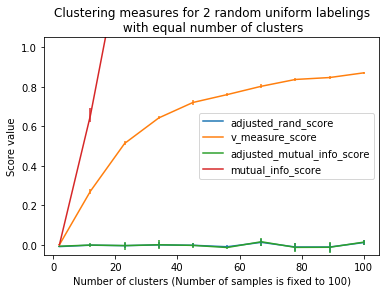

In [23]:
n_samples = 100
n_clusters_range = np.linspace(2, n_samples, 10).astype(np.int)

plt.figure(1)

plots = []
names = []
for score_func in score_funcs:
    print("Computing %s for %d values of n_clusters and n_samples=%d" % (score_func.__name__, len(n_clusters_range), n_samples))

    t0 = time()
    scores = uniform_labelings_scores(score_func, n_samples, n_clusters_range)
    print("done in %0.3fs" % (time() - t0))
    plots.append(plt.errorbar(n_clusters_range, np.median(scores, axis=1), scores.std(axis=1))[0])
    names.append(score_func.__name__)

plt.title("Clustering measures for 2 random uniform labelings\n with equal number of clusters")
plt.xlabel('Number of clusters (Number of samples is fixed to %d)' % n_samples)
plt.ylabel('Score value')
plt.legend(plots, names)
plt.ylim(ymin=-0.05, ymax=1.05)

Random labeling with varying n_clusters against ground class labels with fixed number of clusters

Computing adjusted_rand_score for 10 values of n_clusters and n_samples=1000
done in 0.043s
Computing v_measure_score for 10 values of n_clusters and n_samples=1000
done in 0.050s
Computing adjusted_mutual_info_score for 10 values of n_clusters and n_samples=1000
done in 0.187s
Computing mutual_info_score for 10 values of n_clusters and n_samples=1000
done in 0.041s


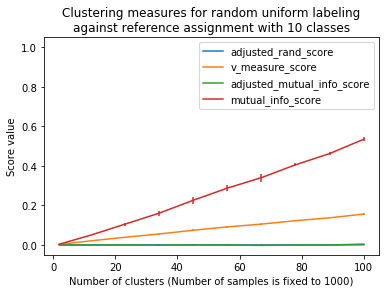

In [24]:
n_samples = 1000
n_clusters_range = np.linspace(2, 100, 10).astype(np.int)
n_classes = 10

plt.figure(2)

plots = []
names = []
for score_func in score_funcs:
    print("Computing %s for %d values of n_clusters and n_samples=%d"
          % (score_func.__name__, len(n_clusters_range), n_samples))

    t0 = time()
    scores = uniform_labelings_scores(score_func, n_samples, n_clusters_range,
                                      fixed_n_classes=n_classes)
    print("done in %0.3fs" % (time() - t0))
    plots.append(plt.errorbar(
        n_clusters_range, scores.mean(axis=1), scores.std(axis=1))[0])
    names.append(score_func.__name__)

plt.title("Clustering measures for random uniform labeling\n"
          "against reference assignment with %d classes" % n_classes)
plt.xlabel('Number of clusters (Number of samples is fixed to %d)' % n_samples)
plt.ylabel('Score value')
plt.ylim(ymin=-0.05, ymax=1.05)
plt.legend(plots, names)
plt.show()

## Credits & Links